<a href="https://colab.research.google.com/github/Aarti117/Data-Analytics/blob/main/Data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Data Visualization Project - Third Year Level
Dataset: Restaurant Tips
Records: 244
Columns: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

📋 Data Overview:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Missing values: 0


<ipython-input-1-5f5938274875>:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_stats = tips.groupby('day')['tip'].agg(['mean', 'std']).reset_index()
<ipython-input-1-5f5938274875>:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_time = tips.groupby(['sex', 'time'])['tip'].mean().unstack()


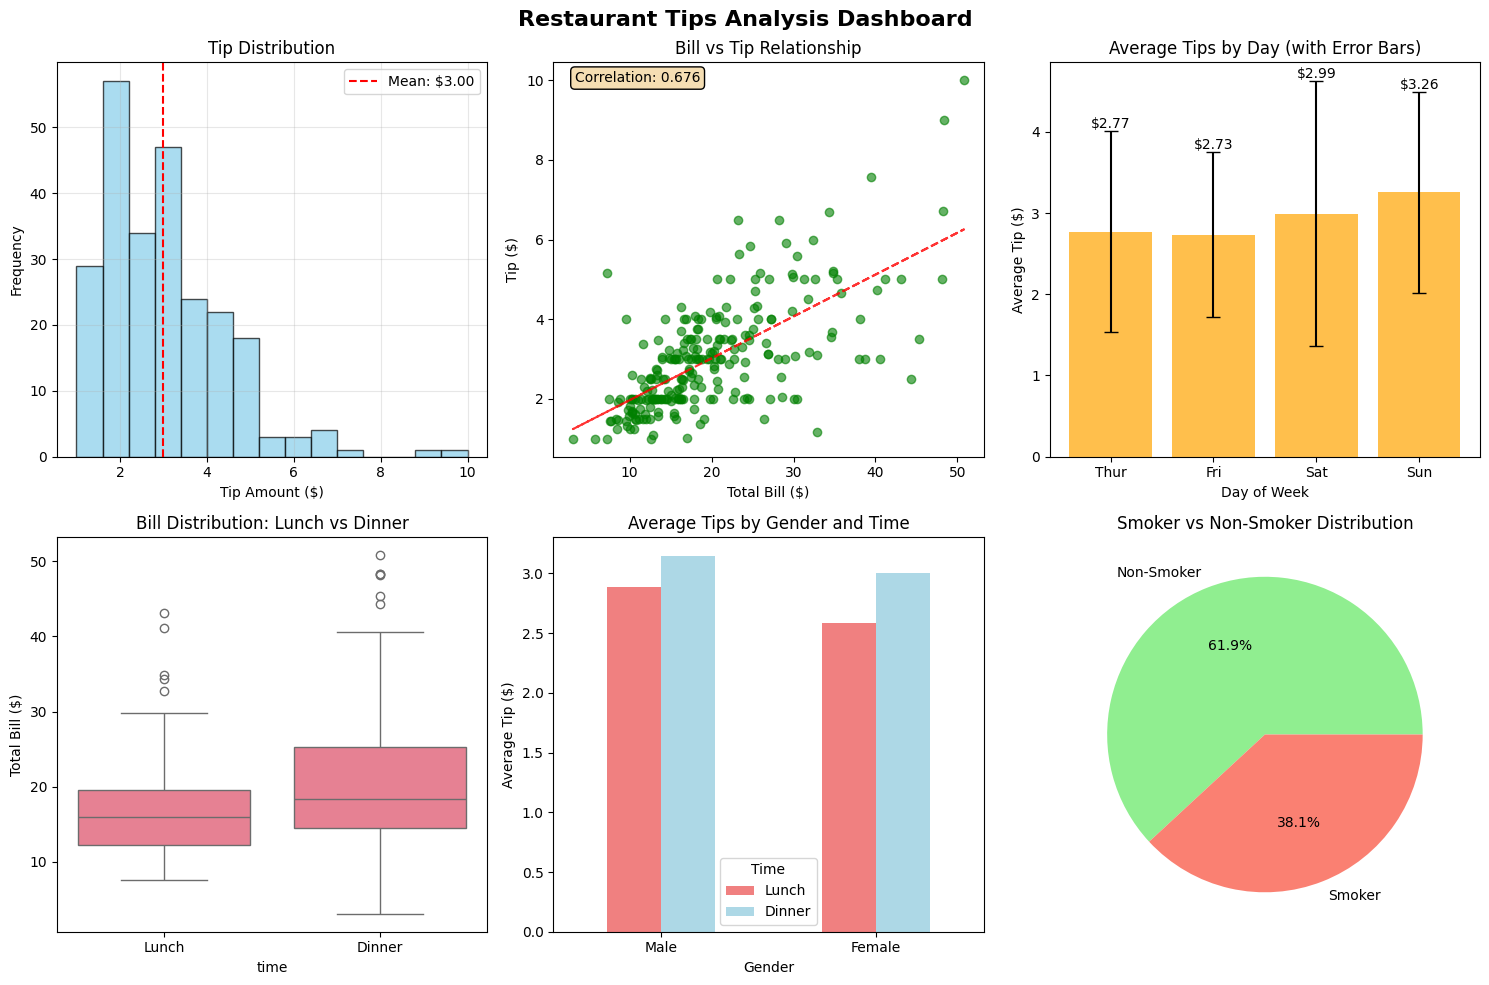


📊 Key Insights:
• Average tip: $3.00
• Highest tipping day: Sun
• Bill-tip correlation: 0.676
• Dinner vs Lunch avg bill: $20.80 vs $17.17

📈 BONUS: Iris Flower Analysis


<ipython-input-1-5f5938274875>:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"• Highest tipping day: {tips.groupby('day')['tip'].mean().idxmax()}")
<ipython-input-1-5f5938274875>:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"• Dinner vs Lunch avg bill: ${tips.groupby('time')['total_bill'].mean()['Dinner']:.2f} vs ${tips.groupby('time')['total_bill'].mean()['Lunch']:.2f}")


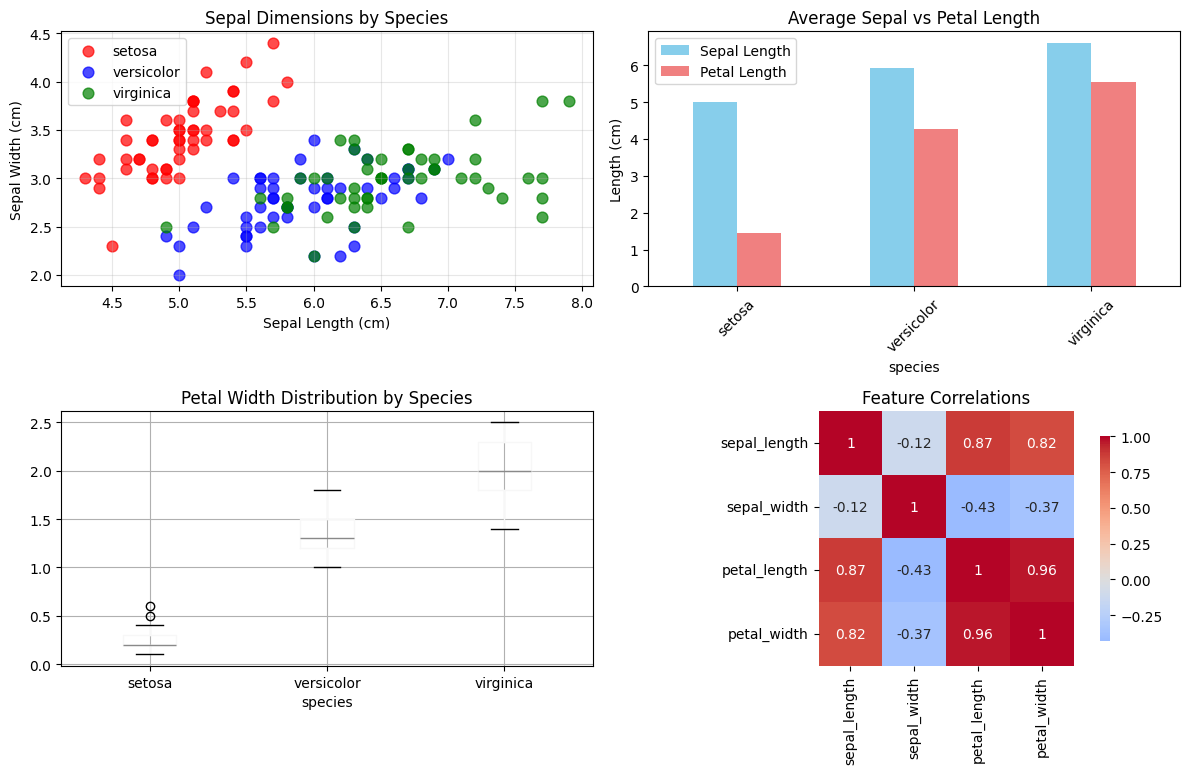

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')
sns.set_palette("husl")

print("📊 Data Visualization Project - Third Year Level")
print("=" * 50)

# Load dataset
tips = sns.load_dataset('tips')
print("Dataset: Restaurant Tips")
print(f"Records: {len(tips)}")
print(f"Columns: {list(tips.columns)}")

print("\n📋 Data Overview:")
print(tips.describe())
print("\nMissing values:", tips.isnull().sum().sum())

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Restaurant Tips Analysis Dashboard', fontsize=16, fontweight='bold')

axes[0,0].hist(tips['tip'], bins=15, color='skyblue', alpha=0.7, edgecolor='black')
axes[0,0].axvline(tips['tip'].mean(), color='red', linestyle='--', label=f'Mean: ${tips["tip"].mean():.2f}')
axes[0,0].set_title('Tip Distribution')
axes[0,0].set_xlabel('Tip Amount ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

axes[0,1].scatter(tips['total_bill'], tips['tip'], alpha=0.6, color='green')
# Add trend line
z = np.polyfit(tips['total_bill'], tips['tip'], 1)
p = np.poly1d(z)
axes[0,1].plot(tips['total_bill'], p(tips['total_bill']), "r--", alpha=0.8)
axes[0,1].set_title('Bill vs Tip Relationship')
axes[0,1].set_xlabel('Total Bill ($)')
axes[0,1].set_ylabel('Tip ($)')
correlation = tips['total_bill'].corr(tips['tip'])
axes[0,1].text(0.05, 0.95, f'Correlation: {correlation:.3f}',
               transform=axes[0,1].transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

day_stats = tips.groupby('day')['tip'].agg(['mean', 'std']).reset_index()
day_order = ['Thur', 'Fri', 'Sat', 'Sun']
day_stats = day_stats.set_index('day').reindex(day_order).reset_index()

bars = axes[0,2].bar(day_stats['day'], day_stats['mean'],
                     yerr=day_stats['std'], capsize=5, color='orange', alpha=0.7)
axes[0,2].set_title('Average Tips by Day (with Error Bars)')
axes[0,2].set_xlabel('Day of Week')
axes[0,2].set_ylabel('Average Tip ($)')

for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0,2].text(bar.get_x() + bar.get_width()/2., height + day_stats.iloc[i]['std'],
                   f'${height:.2f}', ha='center', va='bottom')

sns.boxplot(data=tips, x='time', y='total_bill', ax=axes[1,0])
axes[1,0].set_title('Bill Distribution: Lunch vs Dinner')
axes[1,0].set_ylabel('Total Bill ($)')

gender_time = tips.groupby(['sex', 'time'])['tip'].mean().unstack()
gender_time.plot(kind='bar', ax=axes[1,1], color=['lightcoral', 'lightblue'])
axes[1,1].set_title('Average Tips by Gender and Time')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Average Tip ($)')
axes[1,1].legend(title='Time')
axes[1,1].tick_params(axis='x', rotation=0)

smoker_counts = tips['smoker'].value_counts()
axes[1,2].pie(smoker_counts.values, labels=['Non-Smoker', 'Smoker'],
              autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
axes[1,2].set_title('Smoker vs Non-Smoker Distribution')

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print(f"• Average tip: ${tips['tip'].mean():.2f}")
print(f"• Highest tipping day: {tips.groupby('day')['tip'].mean().idxmax()}")
print(f"• Bill-tip correlation: {tips['total_bill'].corr(tips['tip']):.3f}")
print(f"• Dinner vs Lunch avg bill: ${tips.groupby('time')['total_bill'].mean()['Dinner']:.2f} vs ${tips.groupby('time')['total_bill'].mean()['Lunch']:.2f}")

print("\n" + "="*50)
print("📈 BONUS: Iris Flower Analysis")

iris = sns.load_dataset('iris')

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}
for species in iris['species'].unique():
    subset = iris[iris['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'],
                label=species, alpha=0.7, s=60, c=colors[species])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Dimensions by Species')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
feature_means = iris.groupby('species')[['sepal_length', 'petal_length']].mean()
feature_means.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral'])
plt.title('Average Sepal vs Petal Length')
plt.ylabel('Length (cm)')
plt.xticks(rotation=45)
plt.legend(['Sepal Length', 'Petal Length'])

plt.subplot(2, 2, 3)
iris.boxplot(column='petal_width', by='species', ax=plt.gca())
plt.title('Petal Width Distribution by Species')
plt.suptitle('')

plt.subplot(2, 2, 4)
iris_numeric = iris.select_dtypes(include=[np.number])
correlation = iris_numeric.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlations')

plt.tight_layout()
plt.show()